In [1]:
import warnings
warnings.filterwarnings('ignore')
import yaml
import pandas as pd

In [2]:
from multi_agents import MultiAgentSystem
from helpers import preprocess_expense_data, preprocess_budget_data

In [3]:
with open("/Users/sigmoid/Downloads/llm_keys.yaml", "r") as f:
    llm_keys = yaml.safe_load(f)

In [4]:
file_path = '/Users/sigmoid/Documents/PepsiCo - Gen AI PoC/lift_bot/src'

In [5]:
# Load data (MODIFIED for new structure)
df_expenses = preprocess_expense_data(f"{file_path}/data/Expenses_RB.csv")

In [6]:
df_expenses.head()

,Expense Status,Pending At,Expense Logged by,Audit Status,Audit Comments,Tier 1,Tier 2,Tier 3,Year,Month,Country,Region,Category,Brand,Pep Expense,Bottler Expense,Total Expense
0,Approved,NaN,Bottler,NaN,NaN,STB - Push,Unilateral,Capital Equipment,2024,10,ARGENTINA,LAB South,Energy Drinks,Rockstar,417,397,814
1,Approved,NaN,Bottler,NaN,NaN,STB - Push,Unilateral,CDAs,2024,5,ARGENTINA,LAB South,Sport Drinks,Gatorade,159,151,310
2,Approved,NaN,Bottler,NaN,NaN,STB - Push,Unilateral,CDAs,2024,2,ARGENTINA,LAB South,CSD,Pepsi,104665,99679,204345
3,Approved,NaN,Bottler,NaN,NaN,STB - Push,Unilateral,CDAs,2024,9,ARGENTINA,LAB South,CSD,Pepsi,9532,9078,18610
4,Approved,NaN,Bottler,NaN,NaN,STB - Push,Unilateral,Capital Equipment,2024,10,ARGENTINA,LAB South,Sport Drinks,Gatorade,3507,3340,6848


In [7]:
df_budget = preprocess_budget_data(f"{file_path}/data/Budget_RB.csv")

In [8]:
df_budget.head()

,Region,Country,Year,Category,Brand,Tier 1,Tier 2,Tier 3,Total Budget,Pep Budget,Bottler Budget
0,LAB South,Brazil,2024,Sport Drinks,Gatorade,Pull-Non-Working,Ad Production,Digital Ad Production,701295,368135,333160
1,LAB South,Brazil,2024,Sport Drinks,Gatorade,Pull-Non-Working,Ad Production,Other Ad Production,646688,338608,308080
2,LAB South,Brazil,2024,Sport Drinks,Gatorade,Pull-Non-Working,Ad Production,TV Print Radio OOH Prod,59784,28407,31377
3,LAB South,Brazil,2024,Sport Drinks,Gatorade,Pull-Non-Working,Agency Fees,Creative Agency Fees,650208,335069,315139
4,LAB South,Brazil,2024,Sport Drinks,Gatorade,Pull-Non-Working,Agency Fees,In Store and POS Design/Development,517579,259249,258330


In [9]:
multi_agent_obj = MultiAgentSystem(
    model_name='gpt-4o',
    api_key=llm_keys['open_ai'],
    expense_dataset=df_expenses,
    budget_dataset=df_budget,
    plot_path='jupyter_plots',
)

In [10]:
# Category must also be included

In [11]:
# Expense
# question = 'What are the Tier 1 expenses in 2024 for Brazil?'
# question = "How are the Tier 1 expenses in CY varying for Mexico & Brazil for Pepsi brand?"

In [12]:
# Budget
# question = 'What is the total budget allocated for Mexico in 2025?'
question = "Can you give me split of Tier 1 items for each Brazil & Mexico for 2025?"

In [26]:
question = "What is the total marketing budget allocated for Pepsi Brand in Mexico for 2025?"
question = "How much of this budget has been spent till July?"
question = "Split that spend by tier 1 level and provide insight which tier is overspending vs plan."

In [47]:
question = "How many expenses are still pending approval for Brazil in Q2 2025?"
question = "Who are these expenses pending at?"
question = "For the approved Expenses during this period, how much amount for reimbursement is Bottler eligible for?"

In [63]:
question = "How many expenses were selected for audit in 2025 till now in GUATEMALA? In terms of numbers and amount"
question = "How many of these failed audit checks?"
question = "What are the top reasons for audit fails?"

In [64]:
question

'What are the top reasons for audit fails?'

In [65]:
result = multi_agent_obj.graph.nodes['supervisor'].invoke(
    {
        'question': question
    }
)

Tier mapping response:
{'mapping_needed': False, 'results': []}
--------------------------------------------------------------------------------------------------------------


In [66]:
result

{'result': {'thought_process': 'The user is asking for an analysis of the top reasons for audit failures, which requires accessing and analyzing audit data to identify common failure reasons. This task is best suited for the Insight Agent.',
  'next': 'Insight Agent',
  'enriched_question': 'What are the top reasons for audit failures in Guatemala for 2025?'},
 'messages': [AIMessage(content='The user is asking for an analysis of the top reasons for audit failures, which requires accessing and analyzing audit data to identify common failure reasons. This task is best suited for the Insight Agent.', additional_kwargs={}, response_metadata={}, name='supervisor')],
 'next': 'Insight Agent',
 'type': 'agent'}

In [67]:
result2 = multi_agent_obj.graph.nodes['Insight Agent'].invoke(
    {
        'enriched_question': result['result']['enriched_question']
    }
)



> Entering new AgentExecutor chain...

Invoking: `analyze_expense_data` with `Identify the top reasons for audit failures in Guatemala for the year 2025.`


Response Text:
<approach>
To identify the top reasons for audit failures in Guatemala for the year 2025, I will need to:
1. Filter the dataset for entries where the "Country" is Guatemala and the "Year" is 2025.
2. Further filter these entries to include only those where the "Audit Status" is "Audit Failed".
3. Group the filtered data by "Audit Comments" to identify the reasons for audit failures.
4. Count the occurrences of each reason to determine the top reasons for audit failures.
5. Sort the reasons by their count in descending order to identify the most common reasons.
</approach>

<code>
import pandas as pd

# Filter the dataset for Guatemala in 2025 with Audit Failed status
filtered_df = df[
    (df['Country'].str.strip().str.upper() == 'GUATEMALA') &
    (df['Year'] == 2025) &
    (df['Audit Status'].str.strip().str.uppe

In [19]:
result2.keys()

dict_keys(['input', 'history', 'output', 'intermediate_steps', 'recorder_steps', 'agent'])

In [25]:
result2['output']

'<answer>The total marketing budget allocated for the Pepsi Brand in Mexico for 2025 is $205,698,800, and the total amount spent until July 2025 is $3,283,126.</answer><graph>None</graph>'

In [18]:
len(result2['recorder_steps'])

3

In [19]:
len(result2['recorder_steps'][-2:])

2

In [20]:
result2['input']

'Provide a split of Tier 1 items for Brazil and Mexico for the year 2025.'

In [21]:
result2['recorder_steps'][0]['observation']['approach']

'To answer this question, I will need to:\n1. Filter the dataset for the year 2025 and for the countries Brazil and Mexico.\n2. Group the filtered data by "Country" and "Tier 1" to get the sum of "Total Expense" for each "Tier 1" category.\n3. Calculate the percentage share of each "Tier 1" category within each country.\n4. Prepare the data for visualization to show the split of "Tier 1" items for Brazil and Mexico.'

In [22]:
result2['recorder_steps'][0]['observation']['answer']

In [26]:
result2['recorder_steps'][1]['observation']['approach']

'To answer this question, I will need to:\n1. Filter the dataset for the year 2025 and for the countries Brazil and Mexico.\n2. Group the filtered data by "Country" and "Tier 1" to calculate the total "Total Expense" for each "Tier 1" category within each country.\n3. Calculate the percentage share of each "Tier 1" category within each country by dividing the "Total Expense" of each "Tier 1" category by the total "Total Expense" for that country.\n4. Prepare the result in a structured format to show the split of "Tier 1" items and their percentage share for Brazil and Mexico.'

In [27]:
result2['recorder_steps'][1]['observation']['answer']

'The split of Tier 1 items for Brazil and Mexico for the year 2025, along with the percentage share of each Tier 1 category within each country, is available in   Country            Tier 1  Total Expense  Total Country Expense  \\\n0  BRAZIL  Pull-Non-Working         417512                4810448   \n1  BRAZIL      Pull-Working        1031633                4810448   \n2  BRAZIL        STB - Push        3361303                4810448   \n3  MEXICO  Pull-Non-Working          25410                8042554   \n4  MEXICO      Pull-Working        4942230                8042554   \n5  MEXICO        STB - Push        3074914                8042554   \n\n   Percentage Share  \n0          8.679275  \n1         21.445674  \n2         69.875051  \n3          0.315944  \n4         61.451002  \n5         38.233054  . The chart visualizes the percentage share of each Tier 1 category within Brazil and Mexico.'

In [28]:
result2['recorder_steps'][2]

{'final_answer': '<answer>For the year 2025, the split of Tier 1 items for Brazil and Mexico is as follows:\n\n**Brazil:**\n- Pull-Non-Working: $417,512 (8.68%)\n- Pull-Working: $1,031,633 (21.45%)\n- STB - Push: $3,361,303 (69.88%)\n\n**Mexico:**\n- Pull-Non-Working: $25,410 (0.32%)\n- Pull-Working: $4,942,230 (61.45%)\n- STB - Push: $3,074,914 (38.23%)\n\nThe chart visualizes the percentage share of each Tier 1 category within Brazil and Mexico.</answer><graph>jupyter_plots/plot_b0bb31b03b41468093ff1651baada5f7.png</graph>'}

In [29]:
result2['output'] == result2['recorder_steps'][2]['final_answer']

True

In [30]:
question

'Can you give me split of Tier 1 items for each Brazil & Mexico for 2025?'

Tier mapping response:
{'mapping_needed': True, 'results': [{'tier_1': 'Pull-Non-Working'}, {'tier_1': 'Pull-Working'}, {'tier_1': 'STB - Push'}]}
--------------------------------------------------------------------------------------------------------------


> Entering new AgentExecutor chain...

Invoking: `analyze_expense_data` with `Provide a split of Tier 1 items for Brazil and Mexico for the year 2025.`


Response Text:
<approach>
To answer this question, I will need to:
1. Filter the dataset for the countries "Brazil" and "Mexico" and the year 2025.
2. Group the filtered data by "Tier 1" and calculate the sum of "Total Expense" for each "Tier 1" category.
3. Calculate the percentage share of each "Tier 1" category in the total expense for both Brazil and Mexico.
4. Return the results in a structured format and visualize the split using a bar chart.
</approach>

<code>
import pandas as pd

# Filter the data for Brazil and Mexico for the year 2025
filtered_df = df[(df['Year'] == 20

Tier mapping response:
{'mapping_needed': True, 'results': [{'tier_1': 'Pull-Non-Working'}, {'tier_1': 'Pull-Working'}, {'tier_1': 'STB - Push'}]}
--------------------------------------------------------------------------------------------------------------


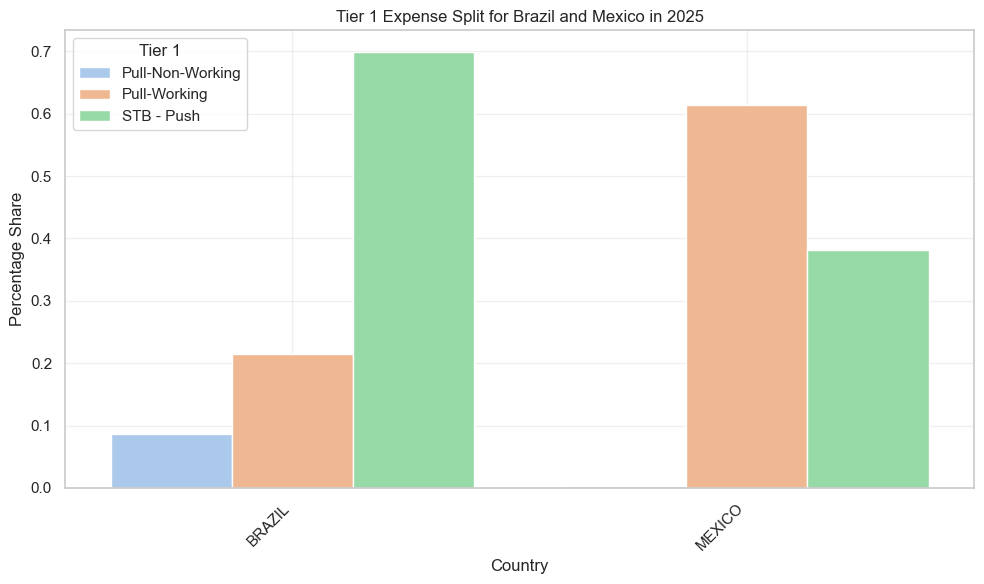

In [31]:
result3 = multi_agent_obj.graph.invoke(
    {
        'question': question
    }
)

In [32]:
result3

{'result': {'thought_process': "The Insight Agent has provided a detailed breakdown of Tier 1 items for Brazil and Mexico for the year 2025. The response includes both the monetary values and percentage shares for each category within the two countries. This comprehensive analysis fulfills the user's request.",
  'next': 'FINISH',
  'direct_response': 'For the year 2025, the split of Tier 1 items for Brazil and Mexico is as follows:\n\n**Brazil:**\n- Pull-Non-Working: $417,512 (8.68%)\n- Pull-Working: $1,031,633 (21.45%)\n- STB - Push: $3,361,303 (69.88%)\n\n**Mexico:**\n- Pull-Non-Working: $25,410 (0.32%)\n- Pull-Working: $4,942,230 (61.45%)\n- STB - Push: $3,074,914 (38.23%)\n\nThe chart visualizes the percentage share of each Tier 1 category within Brazil and Mexico.',
  'enriched_question': 'What is the split of Tier 1 items for Brazil and Mexico for the year 2025?'},
 'messages': [AIMessage(content="The Insight Agent has provided a detailed breakdown of Tier 1 items for Brazil and